In [1]:
%run C://Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [185]:
def two_point(k):
    a_x = np.random.randint(k)
    a_y = np.random.randint(k)
    b_x = np.random.randint(k)
    b_y = np.random.randint(k)
    if abs(b_x - a_x) < 2 :
        b_x = np.random.randint(k)
        if abs(b_x - a_x) < 2:
            b_x = np.random.randint(k)
    if abs(b_y == a_y) < 2:
        b_y = np.random.randint(k)
        if abs(b_y == a_y) < 2:
            b_y = np.random.randint(k)
    c_x = min(a_x,b_x)
    c_y = min(a_y,b_y)
    d_x = max(a_x,b_x)
    d_y = max(a_y,b_y)
    return (c_x, c_y, d_x, d_y)

def zeros(k):
    mat = np.zeros((k,k))
    return (mat)

def mk_square(k):
    back = zeros(k)
    c_x, c_y, d_x, d_y = two_point(k)
    back[c_x,c_y:d_y+1] = 1
    back[d_x,c_y:d_y+1] = 1
    back[c_x:d_x,c_y] = 1
    back[c_x:d_x,d_y] = 1
    return back

In [186]:
D = np.arange(5000*50*50).reshape(5000,50,50)
for i in range (5000):
    D[i] = mk_square(50)


In [187]:
E = D.reshape(5000,-1)

In [188]:
F = np.ones((5000,1))

In [189]:
square= pd.DataFrame(E)

In [190]:
cat = pd.DataFrame(F*2)
cat.columns ={"cat"}

In [191]:
sq = pd.merge(cat,square,left_index=True, right_index=True)

In [192]:
sqq = sq.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


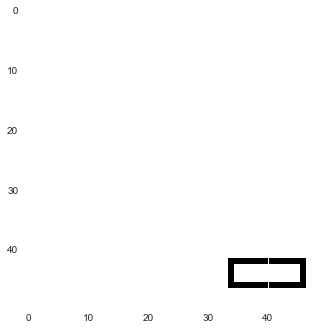

In [197]:
plt.imshow(sqq.iloc[3].reshape(50,50))
plt.show()

In [198]:
sq.to_csv("squares.csv")